# **SÉRIES TEMPORAIS EM FINANÇAS**

## **Objetivo** <br>
Avaliar o entendimento dos conceitos básicos de séries temporais e a capacidade de aplicá-los na análise de dados financeiros de empresas líderes de tecnologia listadas na bolsa de valores.

### **Comparação no Setor de Tecnologia**

- MICROSOFT: MSFT
- ALPHABET INC: GOGL
- TESLA, INC: TSLA
- AMAZONCOM, INC: AMZON
- APPLE INC: AAPL
- META: META
- NVIDIA: NVDA

## **Etapas de análise**

- Pré-processamento
- Análise Exploratória
- Modelos de Decomposição
- Testes de Estacionaridade
- Modelos de Predição ML (AutoARIMA, Theta Forecaster, Prophet) - Extra: XGBoost, Random Forest
- Avaliação dos Modelos (Métricas)
- Análise de Indicadores Financeiros
  - Caudas pesadas
  - Efeitos de Alavancagem
  - Efeito Calendário (Prophet)
  - (Efeito de Bad News)

## **Pré-processamento**

### Importando a base de dados

In [ ]:
import yfinance as yf

In [ ]:
# símbolos das empresas e intervalo de datas
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']
start_date = '2023-01-01'
end_date = '2023-11-22'

data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%%**********************]  7 of 7 completed


In [ ]:
# reindexação
data.reset_index(inplace=True)

In [ ]:
data.shape

(224, 43)

In [ ]:
data

Date   Adj Close                                                  \
                      AAPL        AMZN       GOOGL        META        MSFT   
0   2023-01-03  124.374802   85.820000   89.120003  124.739998  237.474335   
1   2023-01-04  125.657639   85.139999   88.080002  127.370003  227.086456   
2   2023-01-05  124.325089   83.120003   86.199997  126.940002  220.356110   
3   2023-01-06  128.899506   86.080002   87.339996  130.020004  222.953094   
4   2023-01-09  129.426544   87.360001   88.019997  129.470001  225.123840   
..         ...         ...         ...         ...         ...         ...   
219 2023-11-15  188.009995  143.199997  134.619995  332.709991  369.670013   
220 2023-11-16  189.710007  142.830002  136.929993  334.190002  376.170013   
221 2023-11-17  189.690002  145.179993  135.309998  335.040009  369.850006   
222 2023-11-20  191.449997  146.130005  136.250000  339.970001  377.440002   
223 2023-11-21  190.639999  143.899994  136.970001  336.980011  373.070007   

                                  Close              ...        Open  \
           NVDA        TSLA        AAPL        AMZN  ...        MSFT   
0    143.086502  108.099998  125.070000   85.820000  ...  243.080002   
1    147.424591  113.639999  126.360001   85.139999  ...  232.279999   
2    142.586731  110.339996  125.019997   83.120003  ...  227.199997   
3    148.524109  113.059998  129.619995   86.080002  ...  223.000000   
4    156.210693  119.769997  130.149994   87.360001  ...  226.449997   
..          ...         ...         ...         ...  ...         ...   
219  488.837036  242.839996  188.009995  143.199997  ...  371.279999   
220  494.756500  233.589996  189.710007  142.830002  ...  370.959991   
221  492.936676  234.300003  189.690002  145.179993  ...  373.609985   
222  504.045685  235.600006  191.449997  146.130005  ...  371.220001   
223  499.396088  241.199997  190.639999  143.899994  ...  375.670013   

                                Volume                                \
           NVDA        TSLA       AAPL      AMZN     GOOGL      META   
0    148.509995  118.470001  112117500  76706000  28131200  35528500   
1    145.669998  109.110001   89113600  68885100  34854800  32397100   
2    144.910004  110.510002   80962700  67930800  27194400  25447100   
3    144.740005  103.000000   87754700  83303400  41381500  27584500   
4    152.839996  118.959999   70790800  65266100  29003900  26649100   
..          ...         ...        ...       ...       ...       ...   
219  499.350006  239.289993   53790500  63875700  23861500  14531200   
220  486.790009  239.490005   54412900  49653500  28013200  18932600   
221  495.239990  232.000000   50922700  49636700  37240600  14494400   
222  493.119995  234.039993   46505100  41951200  27815500  16960500   
223  501.260010  235.039993   38134500  71226000  22635300  12027900   

                                    
         MSFT      NVDA       TSLA  
0    25740000  40127700  231402800  
1    50623400  43132400  180389000  
2    39585600  38916800  157986300  
3    43613600  40504400  220911100  
4    27369800  50423100  190284000  
..        ...       ...        ...  
219  26860100  47549700  150354000  
220  27182300  33975600  136816800  
221  40157000  32520500  142532800  
222  52465100  41412000  116320100  
223  28423100  56574700  122288000  

[224 rows x 43 columns]

In [ ]:
print(data.columns)

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'META'),
            ('Adj Close',  'MSFT'),
            ('Adj Close',  'NVDA'),
            ('Adj Close',  'TSLA'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', 'GOOGL'),
            (    'Close',  'META'),
            (    'Close',  'MSFT'),
            (    'Close',  'NVDA'),
            (    'Close',  'TSLA'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', 'GOOGL'),
            (     'High',  'META'),
            (     'High',  'MSFT'),
            (     'High',  'NVDA'),
            (     'High',  'TSLA'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', 'GOOGL'),
            (      'Low',  'META'),
            (      'Low',  'MSFT'),
            (      'Low',  '

### Variáveis de Análise

- **Date (Data - Índice)**: Data a qual se refere o devido valor
- **Adj Close (Fechamento Ajustado)**: Preço de fechamento de uma ação que foi ajustado para incluir quaisquer ddsitribuições de dividendos e mudanças devido a eventos corporativos.
- **Close (Fechamento)**:  Último preço o qual a ação foi negociado no durante um dia específico.
- **High (Alta)**: O preço mais alto que uma ação foi negociada no dia específico.
- **Low (Baixa)**:  O preço mais baixo que uma ação foi negociada no dia específico.
- **Open (Abertura)**:  O preço de início da ação no dia em específico.
- **Volume**: Total de ações negociadas no dia.

In [ ]:
data.count()

Date                224
Adj Close  AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA     224
           TSLA     224
Close      AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA     224
           TSLA     224
High       AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA     224
           TSLA     224
Low        AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA     224
           TSLA     224
Open       AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA     224
           TSLA     224
Volume     AAPL     224
           AMZN     224
           GOOGL    224
           META     224
           MSFT     224
           NVDA 

### Dados Duplicados/Nulos

In [ ]:
# verificando dados nulos
null_data = data.isnull().any()

# verificando dados duplicados
duplicate_data = data.duplicated(keep=False)

# Imprimindo os resultados
print("Dados Nulos:")
print(null_data)

print("\nDados Duplicados:")
print(duplicate_data)


Dados Nulos:
Date                False
Adj Close  AAPL     False
           AMZN     False
           GOOGL    False
           META     False
           MSFT     False
           NVDA     False
           TSLA     False
Close      AAPL     False
           AMZN     False
           GOOGL    False
           META     False
           MSFT     False
           NVDA     False
           TSLA     False
High       AAPL     False
           AMZN     False
           GOOGL    False
           META     False
           MSFT     False
           NVDA     False
           TSLA     False
Low        AAPL     False
           AMZN     False
           GOOGL    False
           META     False
           MSFT     False
           NVDA     False
           TSLA     False
Open       AAPL     False
           AMZN     False
           GOOGL    False
           META     False
           MSFT     False
           NVDA     False
           TSLA     False
Volume     AAPL     False
           AMZN     False

# **Análise Exploratória**

## 1. Compreensão dos Dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            224 non-null    datetime64[ns]
 1   (Adj Close, AAPL)   224 non-null    float64       
 2   (Adj Close, AMZN)   224 non-null    float64       
 3   (Adj Close, GOOGL)  224 non-null    float64       
 4   (Adj Close, META)   224 non-null    float64       
 5   (Adj Close, MSFT)   224 non-null    float64       
 6   (Adj Close, NVDA)   224 non-null    float64       
 7   (Adj Close, TSLA)   224 non-null    float64       
 8   (Close, AAPL)       224 non-null    float64       
 9   (Close, AMZN)       224 non-null    float64       
 10  (Close, GOOGL)      224 non-null    float64       
 11  (Close, META)       224 non-null    float64       
 12  (Close, MSFT)       224 non-null    float64       
 13  (Close, NVDA)       224 non-null    float64       

- Para este período de 2023, temos 224 dados de ações (por dia)
- Exceto pela coluna Volume (int64), todos as colunas apresentam float64 como seu tipo de dado
- Valores nulos foram verificados no pré-processamento e não há nenhum

### Análise Descritiva - Foco no valor de Adj Close

In [ ]:
# Média dos Valores de Fechamento Ajustado das Ações
data_desc = data.describe()
data_desc.loc['mean','Adj Close']

AAPL     169.657668
AMZN     118.152233
GOOGL    116.834286
META     252.519554
MSFT     305.613484
NVDA     352.315795
TSLA     214.238259
Name: mean, dtype: float64

- Vemos que a NVIDIA possui uma média maior que as outras ações em relação a todas as ações analisadas

In [ ]:
# Maior Valor de Fechamento Ajustado das Ações
data_desc = data.describe()
data_desc.loc['max','Adj Close']

AAPL     195.926956
AMZN     146.130005
GOOGL    140.550003
META     339.970001
MSFT     377.440002
NVDA     504.045685
TSLA     293.339996
Name: max, dtype: float64

- Temos que o maior valor de uma ação deste ano foi da NVIDIA

In [ ]:
# Menor Valor de Fechamento Ajustado das Ações
data_desc = data.describe()
data_desc.loc['min','Adj Close']

AAPL     124.325089
AMZN      83.120003
GOOGL     86.199997
META     124.739998
MSFT     220.356110
NVDA     142.586731
TSLA     108.099998
Name: min, dtype: float64

- Em contrapartida, o menor valor de uma ação foi da Amazon

### Separando Adj Close do Dataframe

In [ ]:
data_adj_close = data.iloc[:, data.columns.get_level_values(0)=='Adj Close']
data_adj_close.columns = data_adj_close.columns.droplevel()

data_adj_close.head()

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
0,124.374802,85.820000,89.120003,124.739998,237.474335,143.086502,108.099998
1,125.657639,85.139999,88.080002,127.370003,227.086456,147.424591,113.639999
2,124.325089,83.120003,86.199997,126.940002,220.356110,142.586731,110.339996
3,128.899506,86.080002,87.339996,130.020004,222.953094,148.524109,113.059998
4,129.426544,87.360001,88.019997,129.470001,225.123840,156.210693,119.769997


## 2. Decomposição em Componentes (Tendência, Sazonalidade e Resíduo)

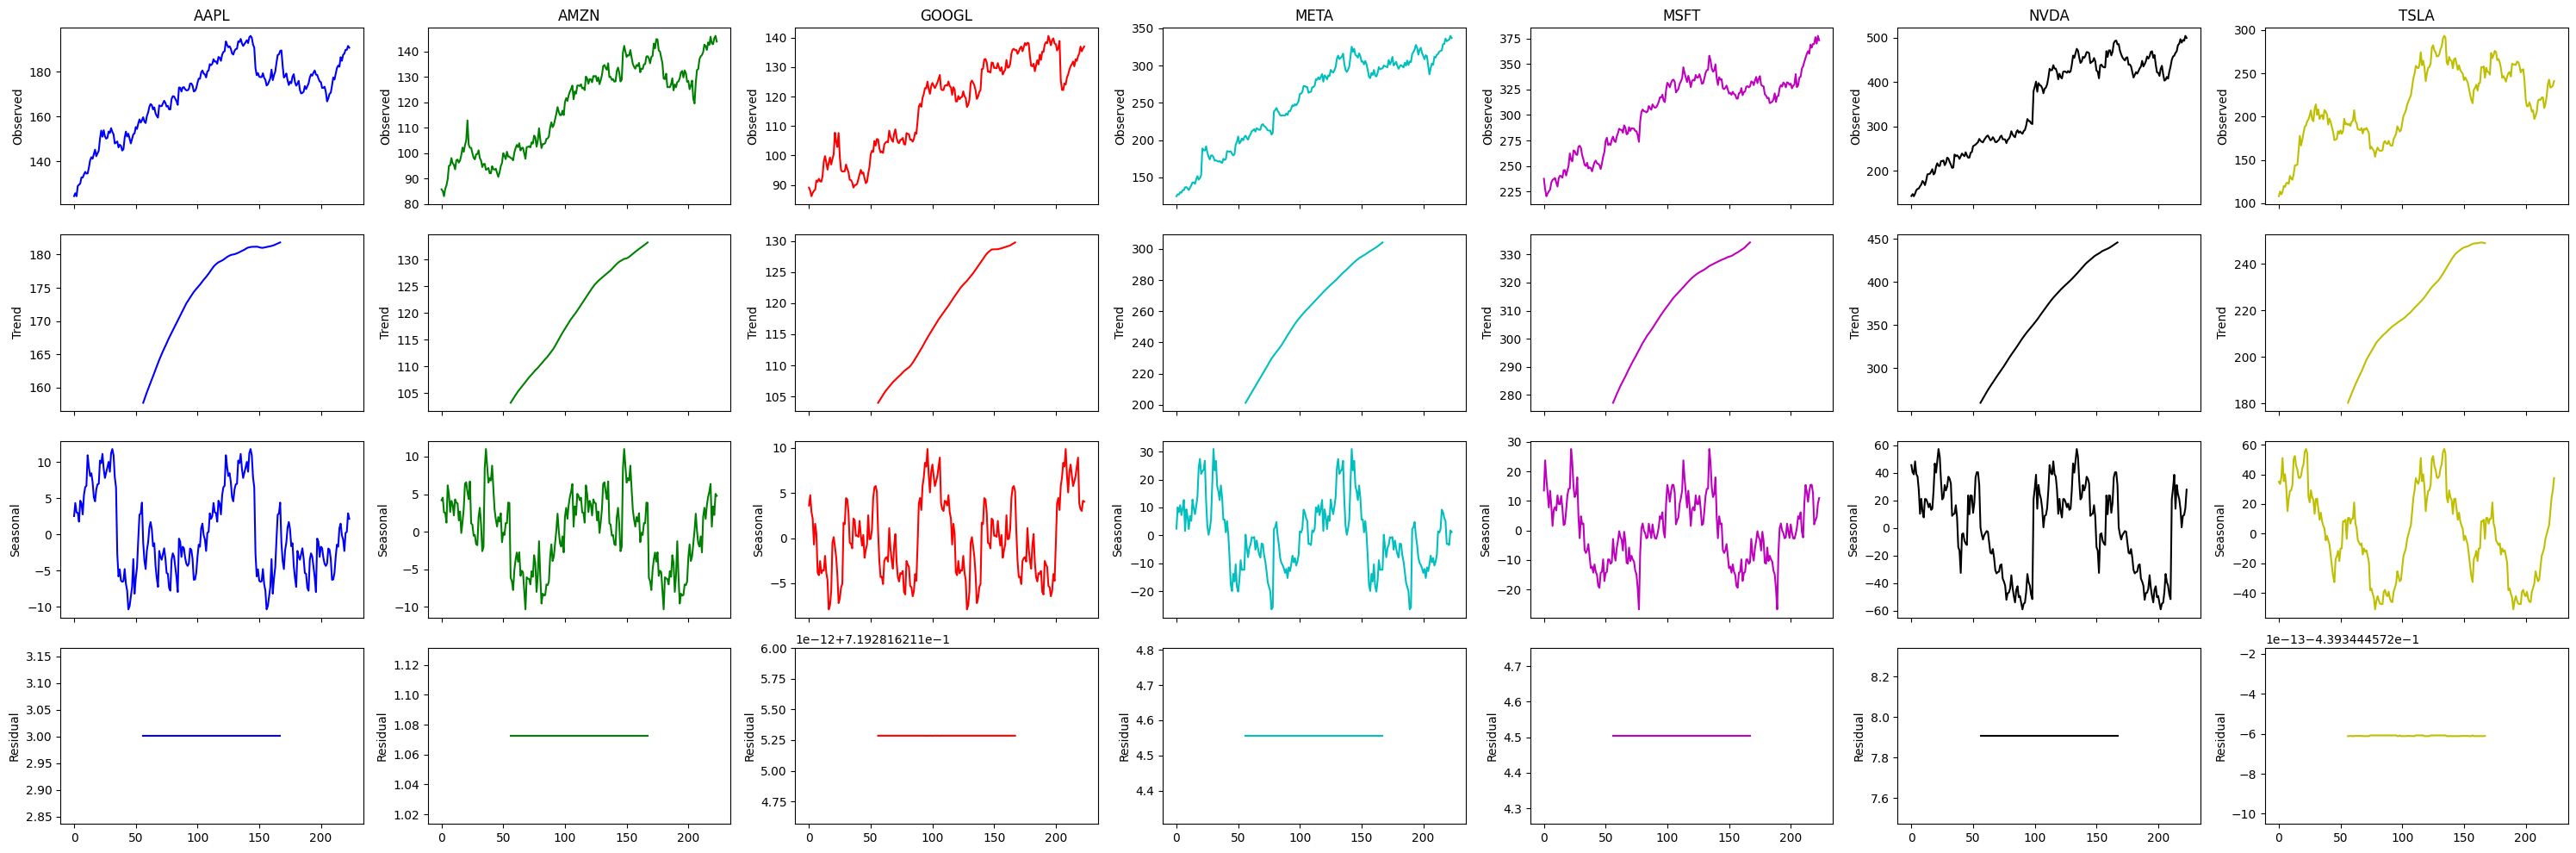

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle


def plot_decompose(dataframe, column, axes, cycol='b'):

    decomposition = sm.tsa.seasonal_decompose(dataframe[column], period=dataframe.shape[0]//2)

    if cycol != 'b':
      cycol = next(cycol)
    decomposition.observed.plot(ax=axes[0], legend=False, color=cycol)
    axes[0].set_title(column)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False, color=cycol)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False, color=cycol)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False, color=cycol)
    axes[3].set_ylabel('Residual')



fig, axes = plt.subplots(ncols=len(data_adj_close.columns), nrows=4, sharex=True, figsize=(30,10))

cycol = cycle('bgrcmky')

for index, column in enumerate(data_adj_close.columns):
  plot_decompose(data_adj_close, column, axes[:,index], cycol)

plt.tight_layout()
plt.show()

## 3. Teste de Estacionaridade

- Nesta parte será realizado o teste de Augmented Dickey-Fuller para as séries referentes a Adj Close para cada empresa

In [ ]:
# Ralizando o Teste de Estacionaridade para as séries de Adj Close de cada empresa
from statsmodels.tsa.stattools import adfuller

results = {}

for column in data_adj_close:
  result = adfuller(data_adj_close.loc[:,column])
  results[column] = result


### Interpretação dos Resultados do Teste de ADFuller

- **Hipótese Nula do Teste (H0)**: Série Temporal é Não Estacionária
- **result[0]** -> quanto mais negativo, mais próxima de ser estacionária a série é
- **result[1]** -> p-value (Se p-value < 0.05, rejeita H0)
- **result[4]** -> valores críticos

In [ ]:
for index, result in zip(results.keys(), results.values()):
  if result[1] < 0.05:
    print(f'{index} Adj Close -> Estacionária')
  else:
    print(f'{index} Adj Close -> Não Estacionária')

AAPL Adj Close -> Não Estacionária
AMZN Adj Close -> Não Estacionária
GOOGL Adj Close -> Não Estacionária
META Adj Close -> Não Estacionária
MSFT Adj Close -> Não Estacionária
NVDA Adj Close -> Não Estacionária
TSLA Adj Close -> Não Estacionária


- Temos que nenhuma das séries passou no teste de estacionaridade, portanto é necessário realizar transformações nestas séries a ponto de torná-las estacionárias

**obs**: a operação de diferença pode ser realizada direto na modelagem caso utilize do modelo ARIMA

### Transformações para Estacionaridade

In [ ]:
# Realizando a diferença para as 7 séries temporais
data_adj_close_diff = data_adj_close.diff().dropna()

In [ ]:
# Função para verificar a estacionaridade de séries

def estacionaridade(dataframe):
  results = {}

  for column in dataframe:
    result = adfuller(dataframe.loc[:,column])
    results[column] = result

  for index, result in zip(results.keys(), results.values()):
    if result[1] < 0.05:
      print(f'{index} Adj Close -> Estacionária')
    else:
      print(f'{index} Adj Close -> Não Estacionária')

In [ ]:
# Verificando novamente a estacionaridade das séries
estacionaridade(data_adj_close_diff)

AAPL Adj Close -> Estacionária
AMZN Adj Close -> Estacionária
GOOGL Adj Close -> Estacionária
META Adj Close -> Estacionária
MSFT Adj Close -> Estacionária
NVDA Adj Close -> Estacionária
TSLA Adj Close -> Estacionária


- Vemos que apenas utilizando da função de diferença (df.diff()) conseguimos tornar as 7 séries temporais em estacionárias

### Plot das Séries Não Estacionárias

In [ ]:
import matplotlib.pyplot as plt

def plot_all_series(dataframe):
  plt.figure(figsize=(20,16))
  dataframe.plot(subplots=True)
  plt.show()

<Figure size 2000x1600 with 0 Axes>

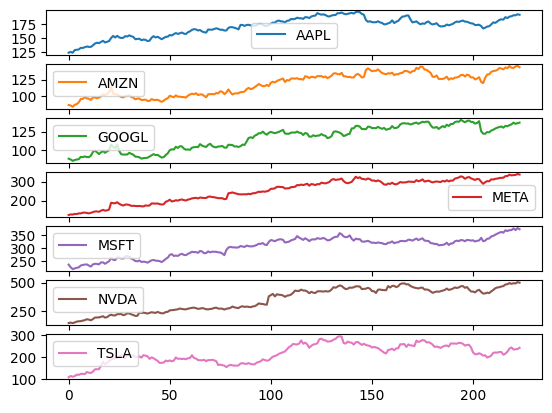

In [ ]:
plot_all_series(data_adj_close)

### Plot das Séries Estacionárias

<Figure size 2000x1600 with 0 Axes>

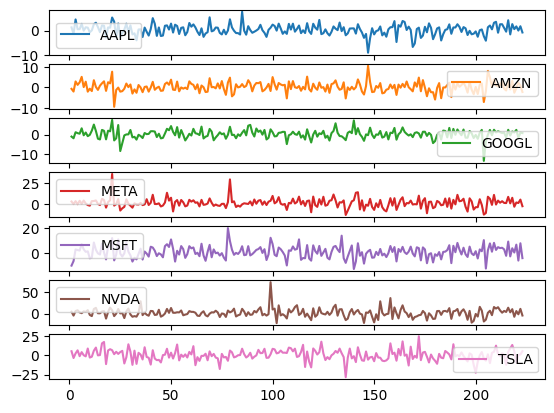

In [ ]:
plot_all_series(data_adj_close_diff)

# **Modelos de decomposição  : Aditivo e Multiplicativo**

Modelo aditivo: quando as variações em torno da tendência são constantes em termos absolutos, independentemente do nível da série temporal. Isso significa que as mudanças absolutas na série são constantes em cada período do ciclo

Y[t] = Tendência[t] + Sazonalidade[t] + Ciclo[t] + Erro[t]

o resíduo (ou erro) representa a diferença entre o valor observado e o valor previsto pela tendência e pelos componentes sazonais e cíclicos

Modelo multiplicativo: quando as variações em torno da tendência estão relacionadas ao nível da série temporal. Isso significa que as mudanças percentuais (ou proporcionais) na série são constantes em cada período do ciclo

Y[t] = Tendência[t] * Sazonalidade[t] * Ciclo[t] * Erro[t]

o resíduo (ou erro) representa a razão entre o valor observado e o valor previsto pela tendência e pelos componentes sazonais e cíclicos

##Aditivo

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Itera sobre as colunas e cria um gráfico para cada uma
for column in data_adj_close.columns:
    # Realiza a decomposição sazonal para cada coluna
    result = sm.tsa.seasonal_decompose(data_adj_close[column], period=data_adj_close.shape[0]//2, model='additive' )

    # Cria um gráfico interativo usando Plotly
    fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=['Original', 'Tendência', 'Sazonalidade', 'Resíduos'])

    # Adiciona os traços ao gráfico
    fig.add_trace(go.Scatter(x=data_adj_close.index, y=result.observed, mode='lines', name=f'Original'), row=1, col=1)
    fig.add_trace(go.Scatter(x=data_adj_close.index, y=result.trend, mode='lines', name=f'Tendência'), row=2, col=1)
    fig.add_trace(go.Scatter(x=data_adj_close.index, y=result.seasonal, mode='lines', name=f'Sazonalidade'), row=3, col=1)
    fig.add_trace(go.Scatter(x=data_adj_close.index, y=result.resid, mode='lines', name=f'Resíduos'), row=4, col=1)

    # Atualiza o layout do gráfico
    fig.update_layout(title=f'Decomposição Aditiva para {column}', showlegend=True)

    # Exibe o gráfico
    fig.show()

##Multiplicativo

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Como o modelo Multiplicativo não lida bem com números negativos ou zeros, será necessário tratá-los

data_adjd_close_mult = data_adj_close_diff.copy()

empresas = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
trends = {}
seasonals = {}
residuals = {}

for empresa in empresas:
    for i in range(1, 224):
        if data_adjd_close_mult[empresa][i] <= 0:
            data_adjd_close_mult.loc[i, empresa] = 1 #É uma boa prática transformar números zeros/negativos em 1?

for empresa in empresas:
    decomposition = sm.tsa.seasonal_decompose(data_adjd_close_mult[empresa], period=data_adj_close_diff.shape[0]//2)

    # Armazenando as componentes em dicionários
    trends[empresa] = decomposition.trend
    seasonals[empresa] = decomposition.seasonal
    residuals[empresa] = decomposition.resid


<ipython-input-25-7fdda9d3f2a4>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



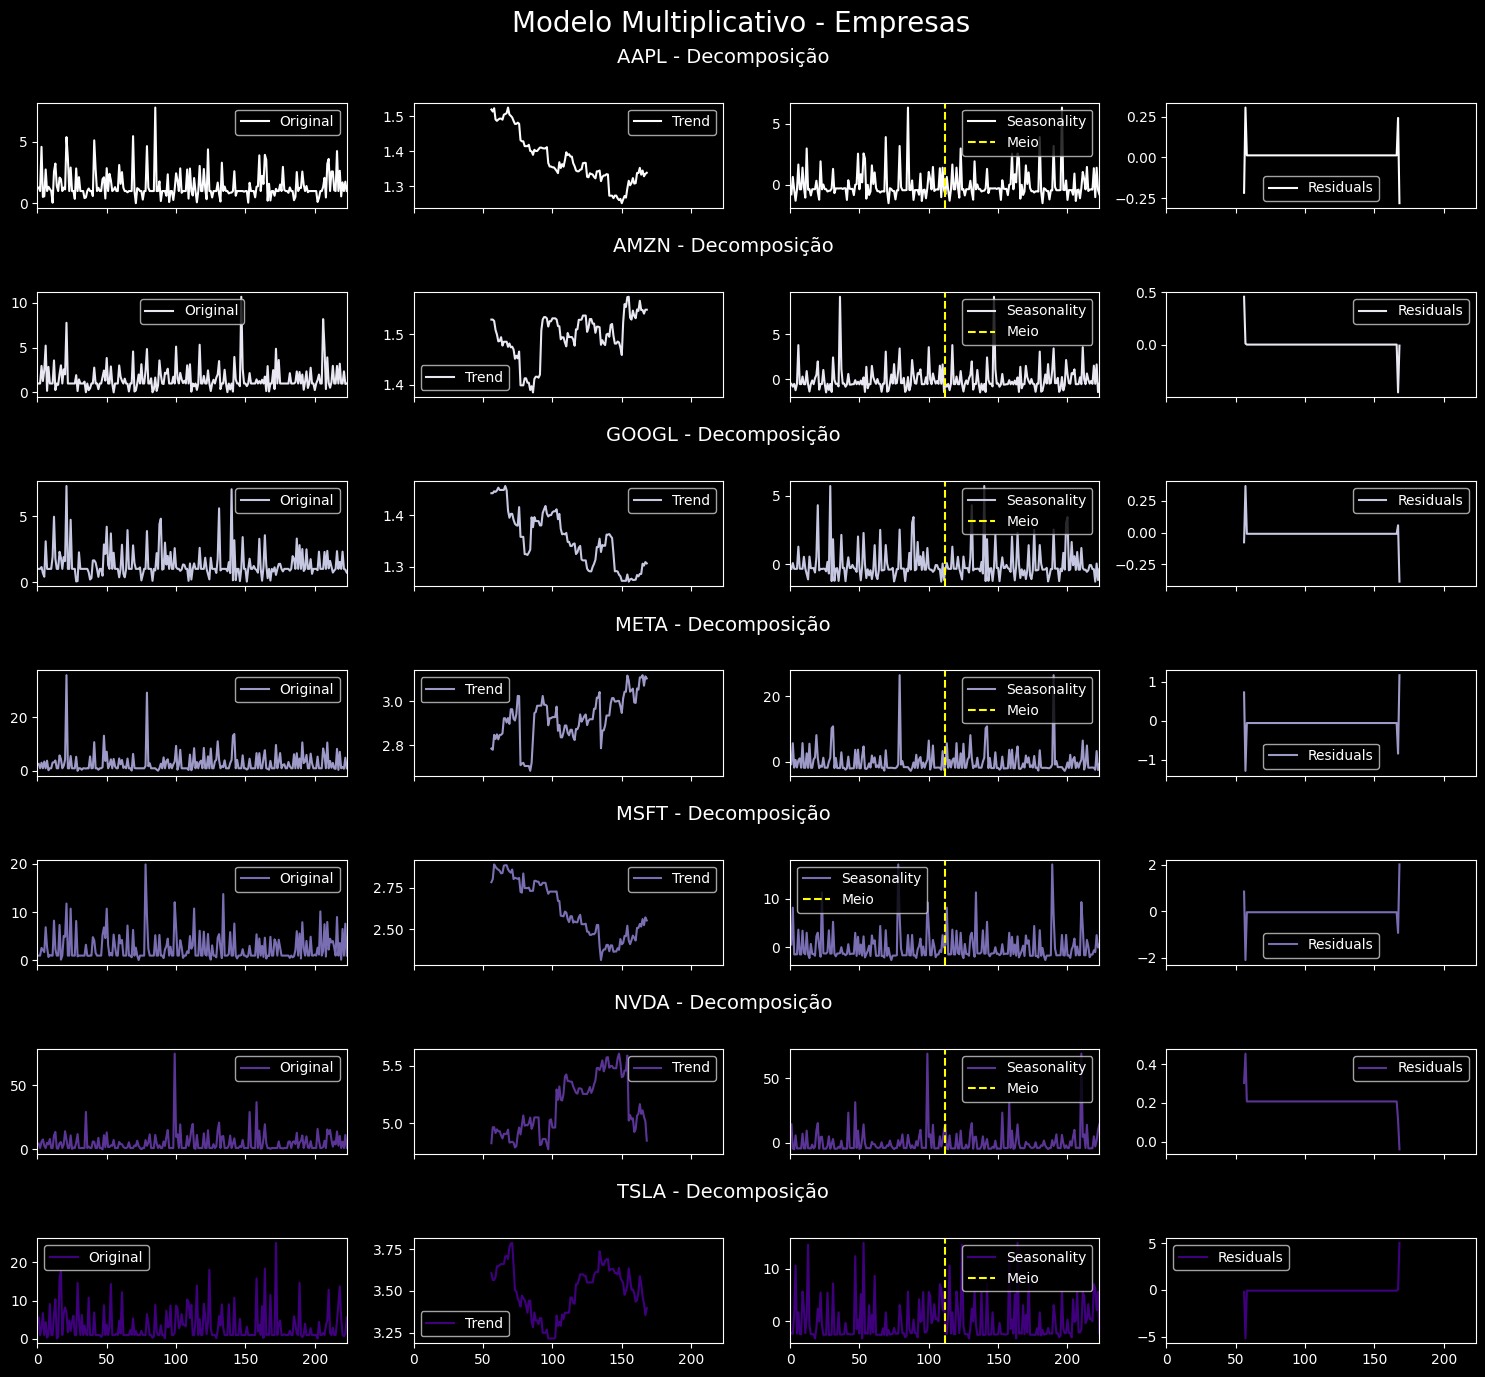

In [ ]:
import matplotlib.pyplot as plt

# Alterando o estilo para dark
plt.style.use('dark_background')

# Lista de empresas
empresas = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
cores = plt.cm.get_cmap('Purples', len(empresas))
# Plotando a decomposição
fig, axs = plt.subplots(len(empresas), 4, figsize=(15, 2 * len(empresas)), sharex=True)

for i, empresa in enumerate(empresas):

    # Original
    axs[i, 0].plot(data_adjd_close_mult[empresa], label='Original',color=cores(i))
    axs[i, 0].legend(loc='best')

    # Tendência
    axs[i, 1].plot(trends[empresa], label='Trend',color=cores(i))
    axs[i, 1].legend(loc='best')

    # Sazonalidade
    axs[i, 2].plot(seasonals[empresa], label='Seasonality',color=cores(i))
    axs[i, 2].axvline(x=112, color='yellow', linestyle='--', label='Meio')
    axs[i, 2].legend(loc='best')

    # Resíduos
    axs[i, 3].plot(residuals[empresa], label='Residuals',color=cores(i))
    axs[i, 3].legend(loc='best')
    # Ajustando os limites do eixo y para os Resíduos
    # Expandindo o eixo X
    axs[i, 3].set_xlim(left=0, right=len(residuals[empresa]))
    #Título
    axs[i, 1].set_title(f'{empresa} - Decomposição', fontsize=14, y=1.3,x=1)

fig.suptitle('Modelo Multiplicativo - Empresas', fontsize=20)
plt.tight_layout()
plt.show()

###APPLE

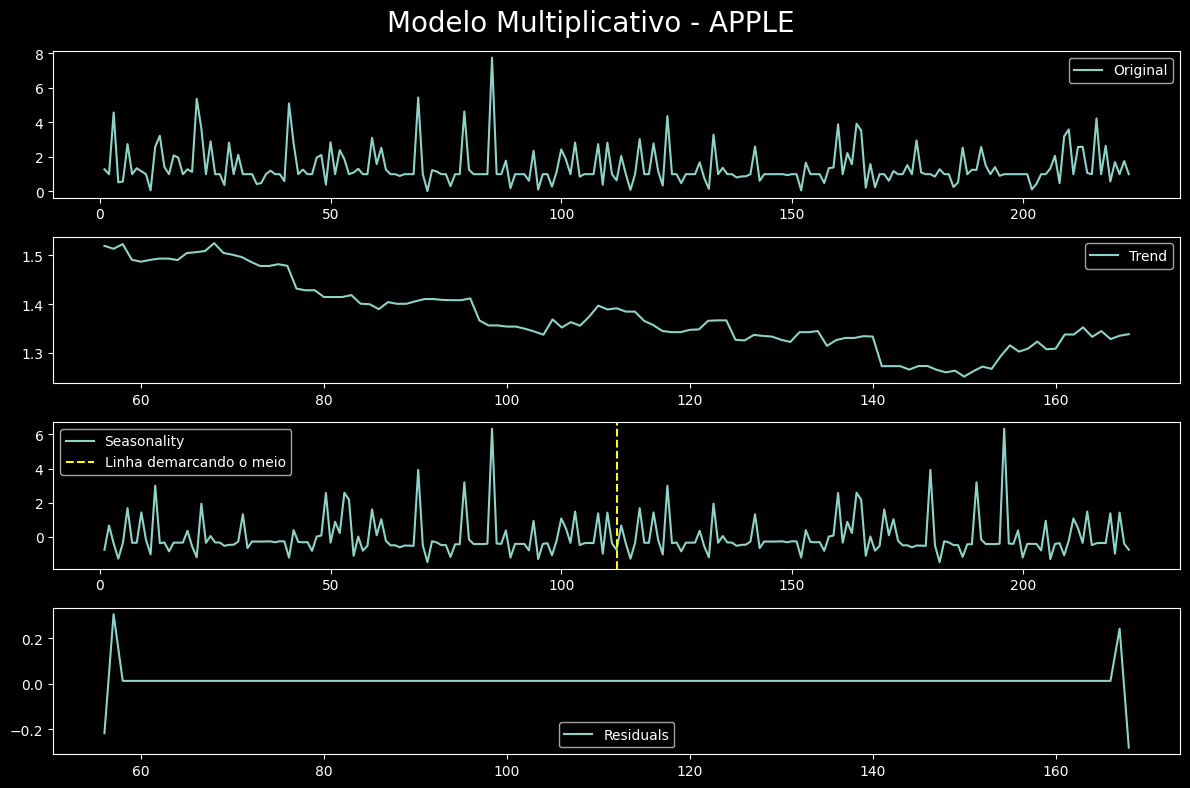

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['AAPL'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['AAPL'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['AAPL'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['AAPL'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - APPLE ', fontsize=20)
plt.tight_layout()
plt.show()

###Amazon

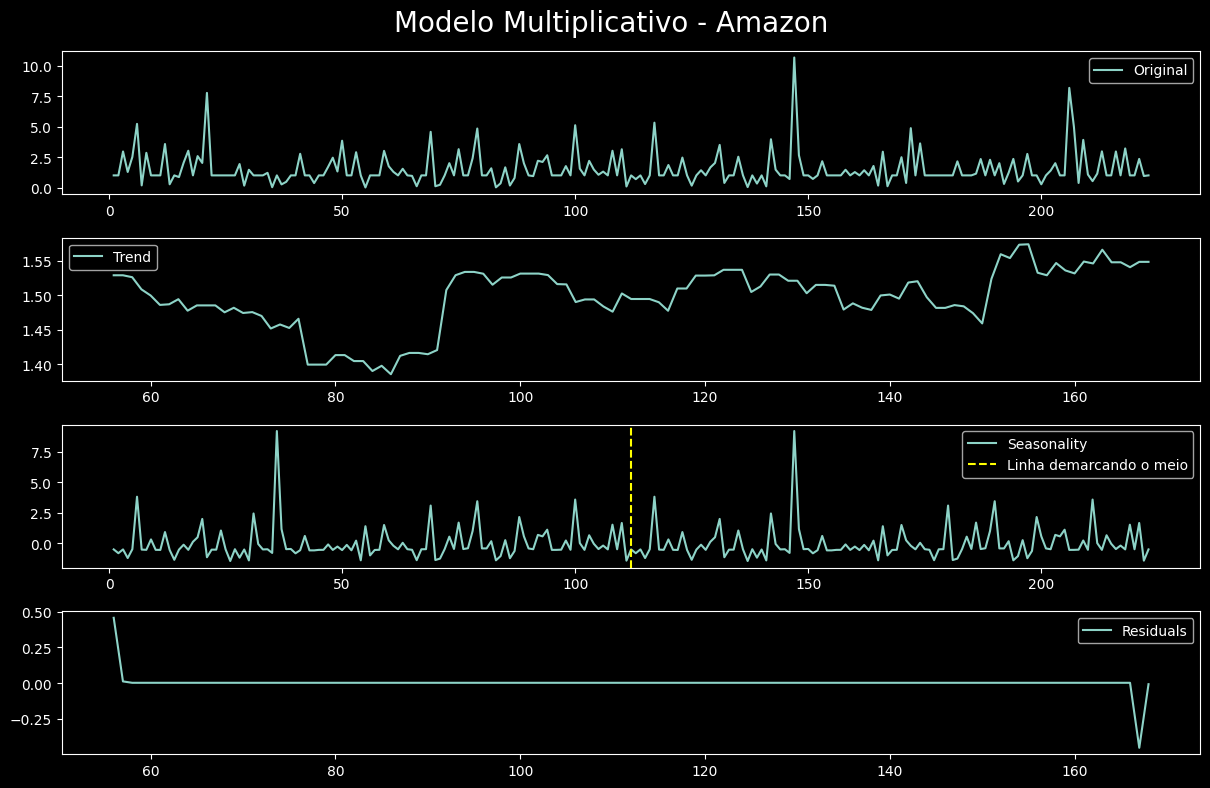

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['AMZN'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['AMZN'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['AMZN'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['AMZN'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - Amazon ', fontsize=20)
plt.tight_layout()
plt.show()

### Google

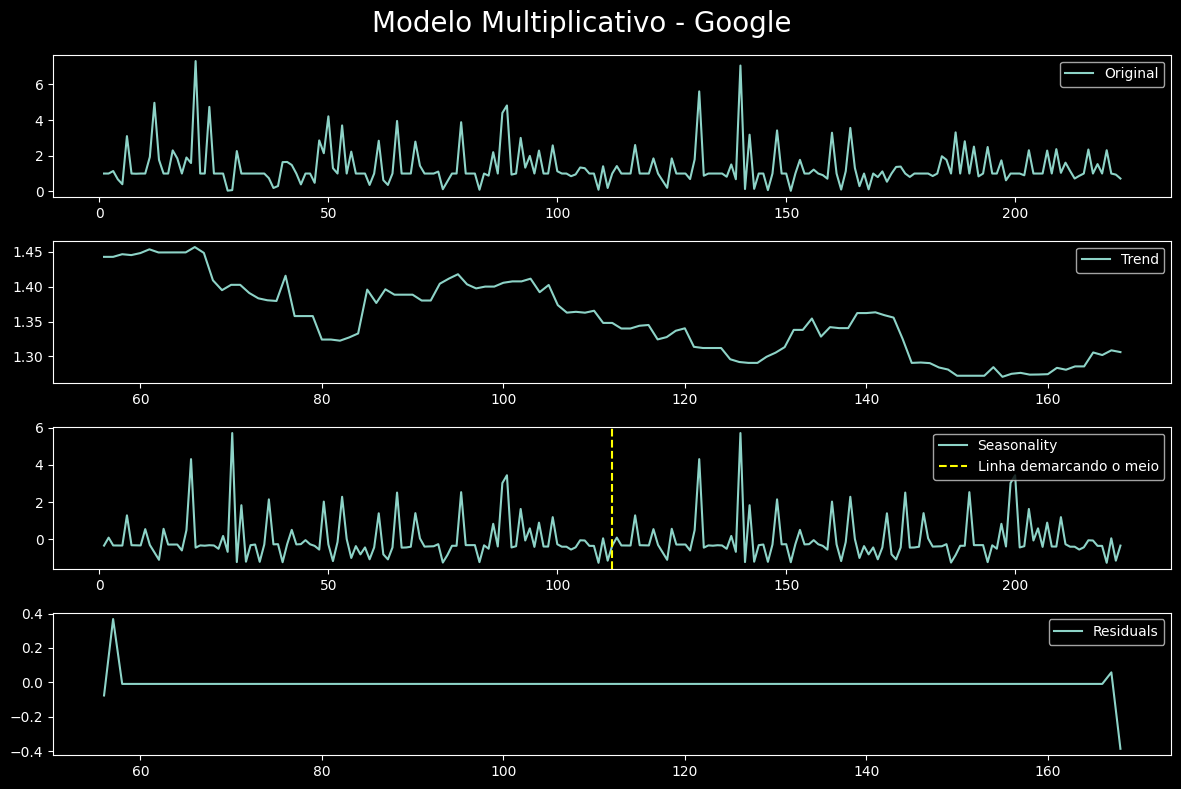

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['GOOGL'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['GOOGL'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['GOOGL'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['GOOGL'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - Google ', fontsize=20)
plt.tight_layout()
plt.show()

### META

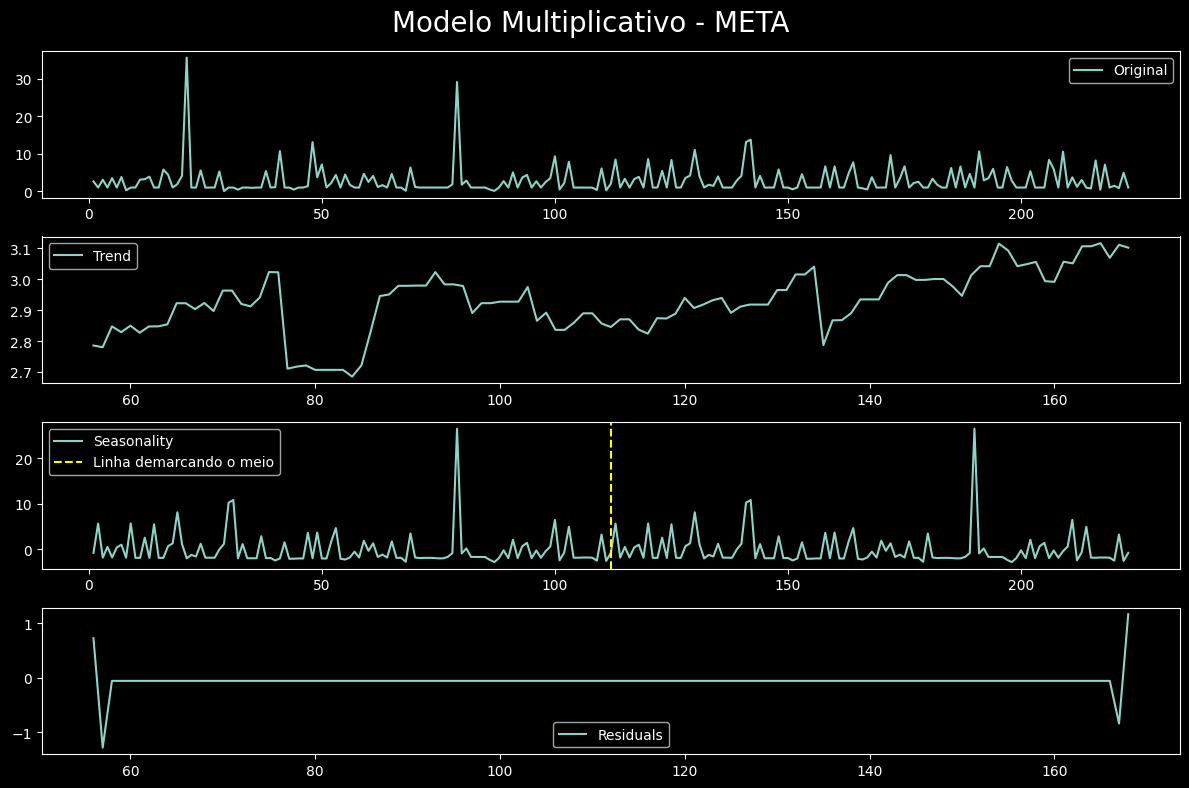

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['META'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['META'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['META'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['META'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - META ', fontsize=20)
plt.tight_layout()
plt.show()

### Microsoft

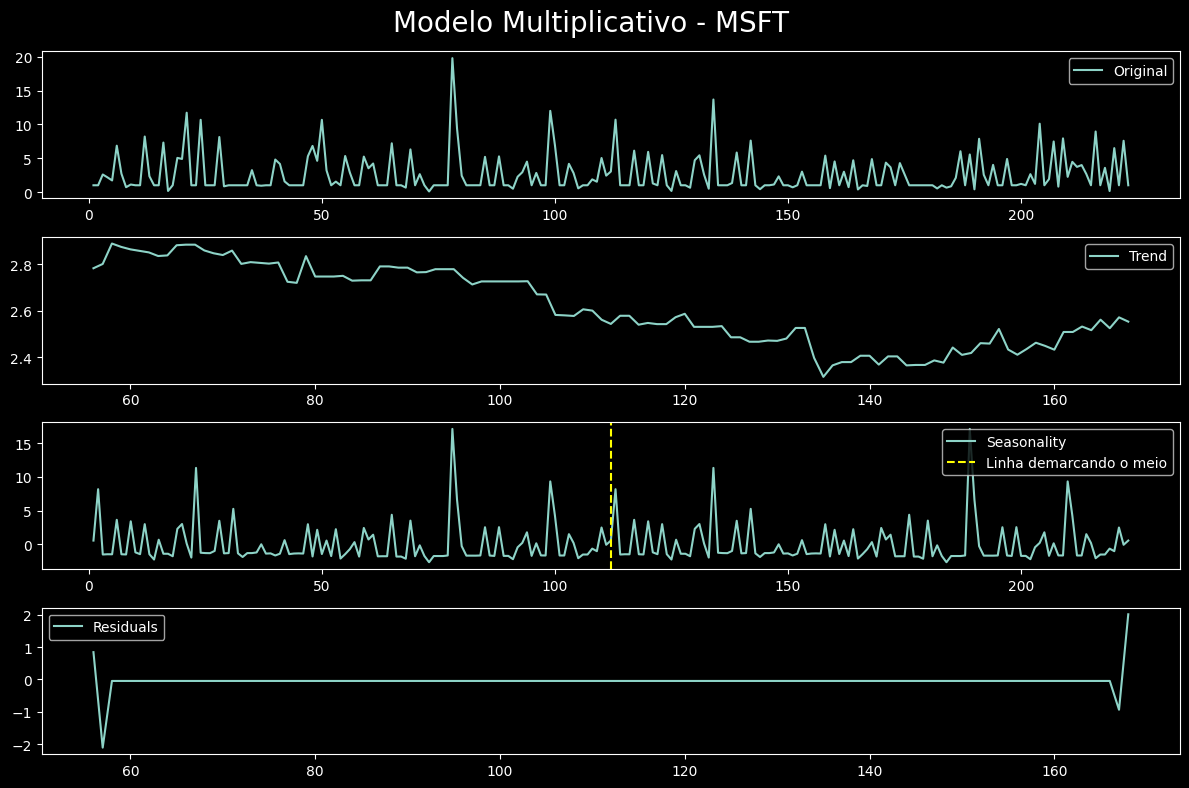

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['MSFT'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['MSFT'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['MSFT'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['MSFT'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - MSFT ', fontsize=20)
plt.tight_layout()
plt.show()

###Nvdia

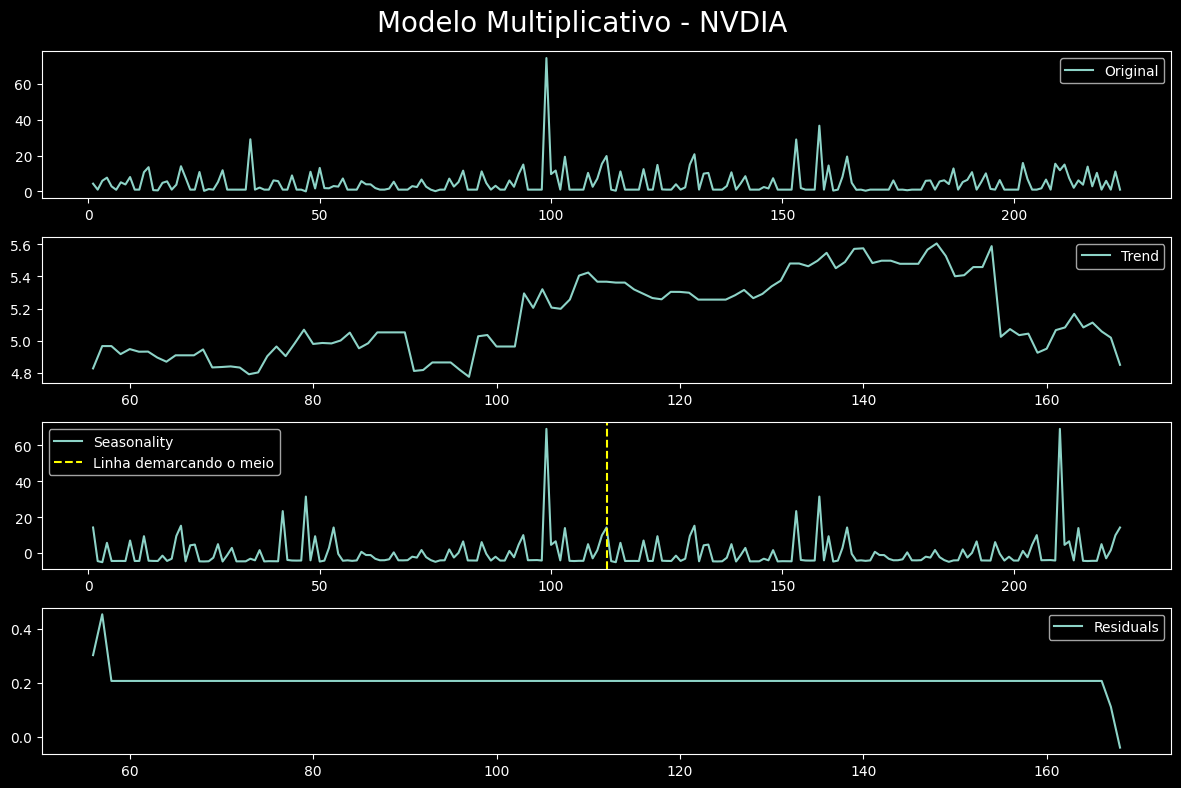

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['NVDA'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['NVDA'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['NVDA'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['NVDA'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - NVDIA ', fontsize=20)
plt.tight_layout()
plt.show()

### TESLA

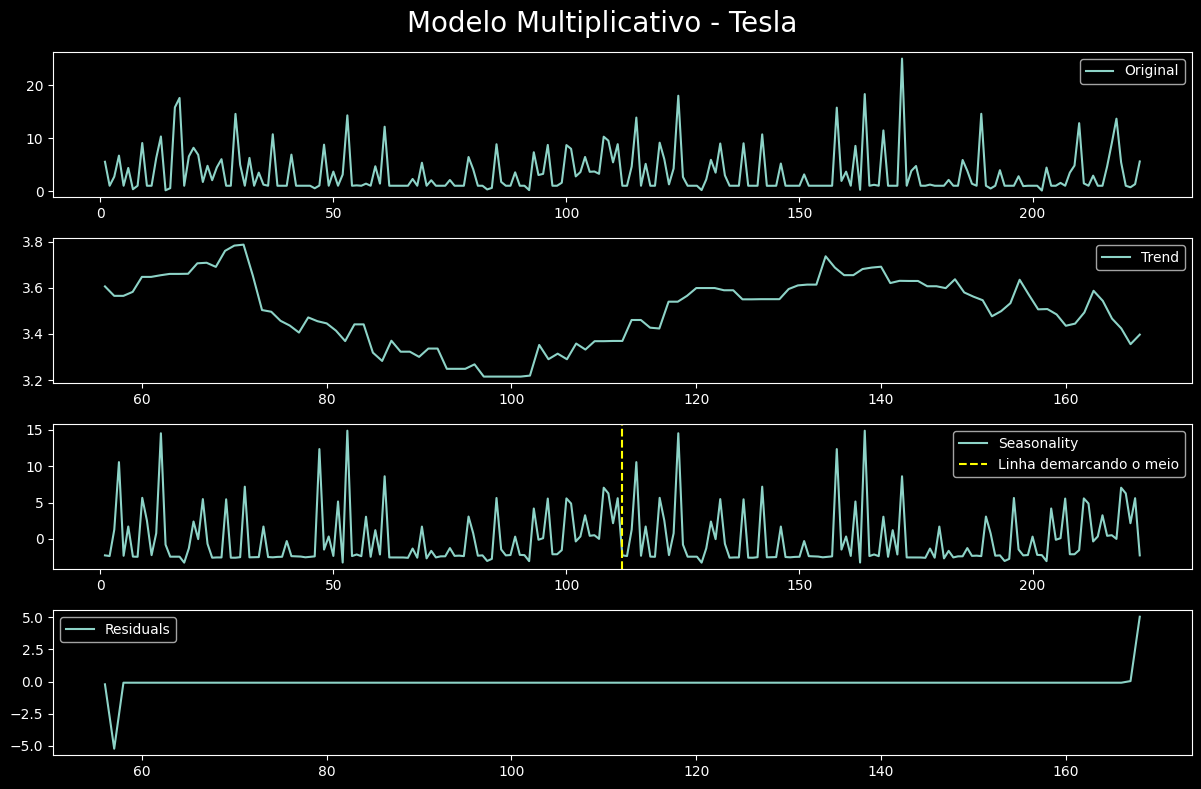

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Plotando a decomposição
fig = plt.figure(figsize=(12,8))

# Original
plt.subplot(411)
plt.plot(data_adjd_close_mult['TSLA'], label='Original')
plt.legend(loc='best')

# Tendência
plt.subplot(412)
plt.plot(trends['TSLA'], label='Trend')
plt.legend(loc='best')

# Sazonalidade
plt.subplot(413)
plt.plot(seasonals['TSLA'],label='Seasonality')
plt.axvline(x=112, color='yellow', linestyle='--', label='Linha demarcando o meio')
plt.legend(loc='best')

# Resíduos
plt.subplot(414)
plt.plot(residuals['TSLA'], label='Residuals')
plt.legend(loc='best')

fig.suptitle('Modelo Multiplicativo - Tesla ', fontsize=20)
plt.tight_layout()
plt.show()

##**Decomposição de Holt-Winters:**


Breve explicação :

A decomposição de Holt-Winters é um método de suavização exponencial triplo que leva em consideração a tendência, a sazonalidade e os componentes de erro.

In [ ]:
apple = data_adj_close['AAPL']

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
modelo_hw = ExponentialSmoothing(apple, trend='add', seasonal='add', seasonal_periods=12)
resultado_hw = modelo_hw.fit()

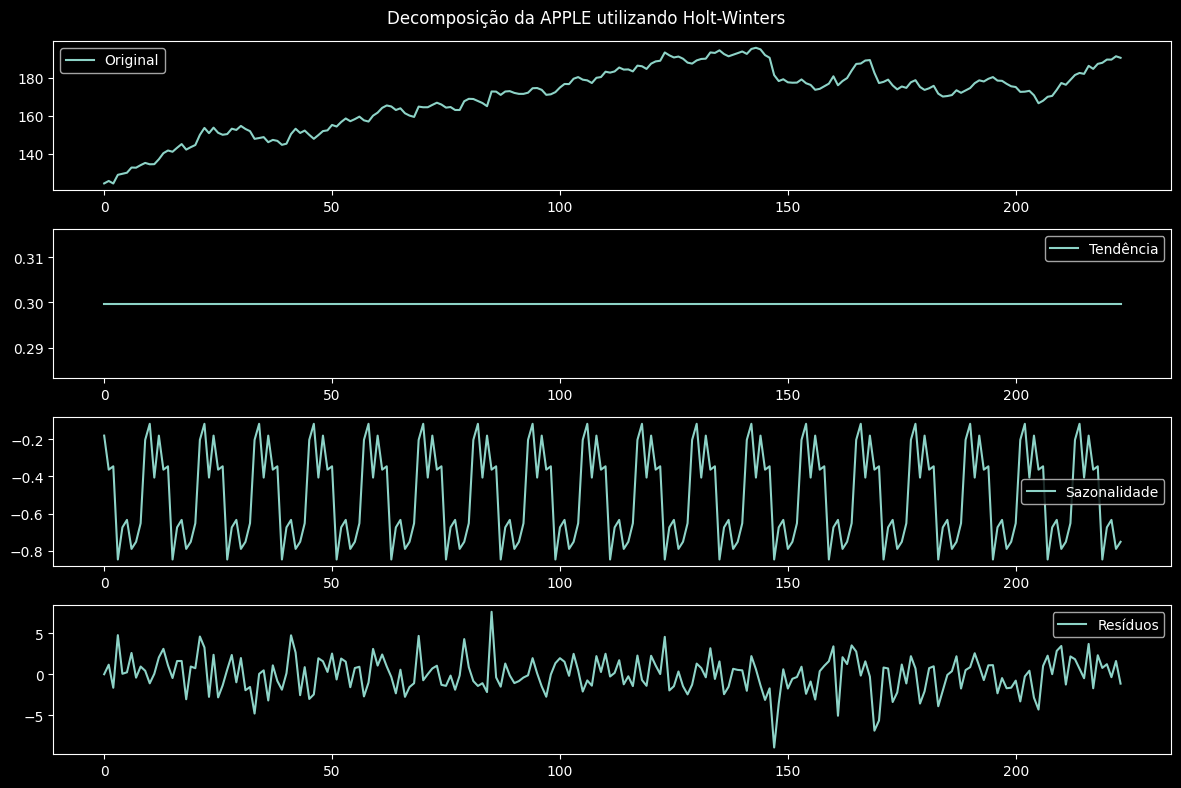

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(apple, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(resultado_hw.trend, label='Tendência')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(resultado_hw.season, label='Sazonalidade')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(resultado_hw.resid, label='Resíduos')
plt.legend()
plt.suptitle('Decomposição da APPLE utilizando Holt-Winters')

plt.tight_layout()

plt.show()

Comentários :

 Porque usar esse modelo e não um aditivo ou multiplicativo ?

**Vantagens : **



**Presença de Sazonalidade:**
O Holt-Winters é especialmente útil quando há padrões sazonais na série temporal. Ele pode capturar essas variações sazonais de uma maneira mais robusta, considerando tanto a tendência quanto a sazonalidade.

**Adaptação a Mudanças na Tendência e Sazonalidade:**

O Holt-Winters pode se adaptar a mudanças na tendência e na sazonalidade ao longo do tempo, tornando-o mais flexível em comparação com modelos aditivos básicos. Isso é útil quando a série temporal exibe variações não lineares ao longo do tempo.

**Ponderação Exponencial:**

A suavização exponencial triplo dá maior peso às observações mais recentes, o que pode ser benéfico quando as observações recentes são mais representativas do comportamento atual da série temporal.

**Modelagem de Erros:**

O modelo de suavização exponencial triplo incorpora uma componente de erro que pode capturar variações não sistemáticas e imprevisíveis na série temporal.

**Horizonte de Previsão a Longo Prazo:**

O Holt-Winters pode ser mais robusto para previsões a longo prazo, especialmente quando há padrões sazonais complexos ou não lineares.

#Modelo de Forecasting

##Theta

O Modelo Theta decompõe uma série temporal em duas ou mais linhas theta.

Cada linha theta representa uma versão modificada da série temporal original, obtida através da aplicação de um coeficiente de suavização à segunda diferença da série.

**Etapas do Modelo**

**Suavização:** Inicialmente, a série temporal é suavizada. Isso é feito ajustando um modelo de suavização exponencial simples à série.

**Desagregação em Linhas Theta:** A série suavizada é então desagregada em duas ou mais linhas theta. Cada linha theta é criada aplicando um coeficiente diferente de suavização às diferenças da série temporal. Tradicionalmente, dois coeficientes são usados:

Theta = 0: Isso leva a uma linha que é equivalente a uma previsão aleatória (Random Walk), mantendo a tendência original da série.

Theta = 2: Isso produz uma linha que é mais plana do que a série original, meio que retirando a tendência.

**Extrapolação das Linhas Theta:**

 Cada linha theta é então extrapolada para o futuro.

**Combinação das Previsões:**

As previsões das linhas theta são combinadas para formar a previsão final. O método original usava uma média simples das previsões das linhas theta.

**Ajuste Sazonal (se necessário):**

Se a série temporal original tiver uma componente sazonal, esta será removida antes da aplicação do modelo Theta e reincorporada nas previsões finais.

**Características e Uso**

**Simplicidade:**

Uma das principais vantagens do Modelo Theta é sua simplicidade, tanto em termos de entendimento quanto de implementação.

**Eficiência em Séries sem Tendências Fortes:**

O modelo é particularmente eficaz para séries temporais que não exibem tendências fortes ou sazonais claras.

**Generalização do Método de Suavização Exponencial Simples:**

Pode ser visto como uma generalização ou extensão do método de suavização exponencial simples.

**Limitações**

O Modelo Theta pode não ser tão eficaz para séries temporais com padrões sazonais fortes ou com tendências claras e consistentes.
Como é um modelo relativamente simples, pode não capturar a complexidade de algumas séries temporais, especialmente aquelas com dinâmicas não lineares.

Aplicação do modelo

In [ ]:
# Instalação das bibliotecas
!pip install -q sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sklearn.metrics import mean_absolute_error, mean_squared_error
from plotly.subplots import make_subplots

In [ ]:
def calcula_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

###Apple

In [ ]:
#Dividr em conjuntos treino / teste
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['AAPL'], test_size=0.20)

In [ ]:
fh_1 = np.arange(1, len(X_test_1) + 1)

#Cada dado ta sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1*24)

#Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

In [ ]:
#Pegar as métricas
mae_theta_1 = mean_absolute_error(X_test_1, X_pred_1)

rmse_theta_1 = np.sqrt(mean_squared_error(X_test_1, X_pred_1))

#smape_theta_1 = smape(X_test_1, X_pred_1)


In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1,
    name = 'Original - Apple',
    marker=dict(color='#00CED1')
),col = 1, row = 1)
fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1,
    name = 'Previsto - Apple',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash'))
    ,col = 1, row = 1)



fig.update_layout(
    template = 'plotly_dark',
    title=dict(
        text = 'Theta-Forecast - Apple',
        x = 0.5,
        font = dict(
            family = 'Arial Black',
            size = 25,
            color = 'White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)
fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)
for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial",size=20,color="White")
fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series
import plotly.graph_objects as go
from plotly.subplots import make_subplots

mse = []
mae = []
smape = []

# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['AAPL'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

#adiciona as metricas nos vetores de métricas
mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Apple',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Apple',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Apple',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Apple',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Amazon

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['AMZN'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Amazon',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Amazon',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Amazon',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Amazon',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Google

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['GOOGL'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Google',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Google',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Google',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Google',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Meta

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['META'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Meta',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Meta',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Meta',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Meta',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Microsoft

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['MSFT'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Microsoft',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Microsoft',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Microsoft',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Microsoft',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Nvidia

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['NVDA'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Nvidia',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Nvidia',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Nvidia',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Nvidia',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

###Tesla

In [ ]:
# Substitua esta linha pelos seus dados reais
X_train_1, X_test_1 = temporal_train_test_split(data_adjd_close_mult['TSLA'], test_size=0.20)
# Apenas para fins de demonstração, usando dados aleatórios

fh_1 = np.arange(1, len(X_test_1) + 1)

# Cada dado está sendo dado por dia, logo 1 dado por 24h
forecaster = ThetaForecaster(sp=1 * 24)

# Ajustar o modelo
forecaster.fit(X_train_1)
X_pred_1 = forecaster.predict(fh_1)

mse.append(mean_squared_error(X_test_1, X_pred_1))
mae.append(mean_absolute_error(X_test_1, X_pred_1))
smape.append(calcula_smape(X_test_1, X_pred_1))

# Criar subplots
fig = make_subplots(rows=1, cols=1)

# Adicionar traços para dados originais e previstos
fig.add_trace(go.Scatter(
    x=X_train_1.index,
    y=X_train_1.values,
    name='Treino - Tesla',
    marker=dict(color='#00CED1')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_test_1.index,
    y=X_test_1.values,
    name='Teste - Tesla',
    marker=dict(color='#DAA520')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=X_pred_1.index,
    y=X_pred_1.values,
    name='Previsto - Tesla',
    marker=dict(color='#DAA520'),
    line=dict(dash='dash')
), row=1, col=1)

# Atualizar layout
fig.update_layout(
    template='plotly_dark',
    title=dict(
        text='Theta-Forecast - Tesla',
        x=0.5,
        font=dict(
            family='Arial Black',
            size=25,
            color='White'
        )
    ),
    height=500, width=1200,
    font=dict(
        family="Arial",
        size=16,
        color="White"
    )
)

fig.update_xaxes(title_text="Data", row=1, col=1)
fig.update_yaxes(title_text="Valores", row=1, col=1)

for i in fig['layout']['annotations']:
    i['font'] = dict(family="Arial", size=20, color="White")

# Exibir o gráfico
fig.show()

Em resumo, o modelo theta é um bom modelo para predição. Sua abordagem de decomposição o torna um método flexível e rápido para prever séries temporais. No mínimo, ele pode servir como um sólido referencial para comparar com outros modelos mais complexos

#Análise dos Modelos

**MAE (Mean Absolute Error):**

É a média dos valores absolutos das diferenças entre os valores previstos e os valores reais.
Fornece uma ideia de quão grandes são os erros de previsão em média.
Menos sensível a outliers do que o MSE.

**MAPE (Mean Absolute Percentage Error):**

É a média do valor absoluto das diferenças percentuais entre os valores previstos e os valores reais.
Útil quando se quer entender o erro em termos relativos, ao invés de absolutos.
Pode ser mais interpretável do que o MAE ou o MSE, especialmente em contextos onde os percentuais são mais intuitivos.

**MSE (Mean Squared Error):**

É a média dos quadrados das diferenças entre os valores previstos e os valores reais.
Tende a penalizar mais fortemente grandes erros, devido ao quadrado das diferenças.

**RMSE (Root Mean Squared Error):**

É a raiz quadrada do MSE.
Traz o erro de volta para as unidades originais, tornando-o mais interpretável do que o MSE.

**SMAPE (Symmetric Mean Absolute Percentage Error):**

É a diferença percentual entre os valores reais e previstos, ajustando para a escala média dos dois. O SMAPE é expresso como uma porcentagem e é especialmente útil quando há valores zero nos dados.

Para fazermos a análise do desempenho dos modelos, utilizaremos as métricas Mean Squared Error e Mean Absolute Error.

Podemos comparar o desempenho dos modelos para cada ação através de um gráfico de linhas:

In [ ]:
fig = go.Figure()

# Adicionar a linha ao gráfico
fig.add_trace(go.Scatter(x= data_adj_close.columns, y=mse, mode='lines+markers', marker=dict(color='#00CED1'), name='MSE'))
fig.add_trace(go.Scatter(x= data_adj_close.columns, y=mae, mode='lines+markers', marker=dict(color='#DAA520'), name='MAE'))
fig.add_trace(go.Scatter(x= data_adj_close.columns, y=smape, mode='lines+markers',marker=dict(color='#FF0000'), name='SMAPE'))

# Personalizar o layout do gráfico
fig.update_layout(
    template = 'plotly_dark',
    title='Métricas de desempenho',
    xaxis_title='Ação',
    showlegend=True,
)

# Exibir o gráfico
fig.show()

Conclusão:
